# mass center of binary image


In [1]:
# binary mask path
mask_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\right"
one_mask_filename = "1002dozono01 (1).png"

In [48]:
import imageio as iio
import os 
import numpy as np
desired_size = 224
img_path = os.path.join(mask_root, one_mask_filename)
print("img_path:", img_path)

img_path: E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right\1002dozono01 (1).png


In [69]:
# image =  iio.imread(img_path)

# img = image.copy() # has to use this otherwise does not own its data
# img.resize((desired_size,desired_size))

# img2=  np.asarray(img)

from PIL import Image
img = np.array(Image.open(img_path).convert('L').resize((desired_size, desired_size)))
print(img.min(), img.max())
label = np.where(img > 0.5, 1, 0)
print(img)
print(type(img2))
print(img.shape)
from skimage.measure import regionprops
# get property by region foreground and raw image\
properties = regionprops(label, img)
print("properties:", properties)
# calculate centeral of mass
print(properties[0])
center_of_mass =  properties[0].centroid
weighted_center_of_mass = properties[0].weighted_centroid
print("center_of_mass:", center_of_mass)
print("weighted_center_of_mass:", weighted_center_of_mass)

0 255
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
(224, 224)
properties: [<skimage.measure._regionprops.RegionProperties object at 0x000001BE0F15E4C8>]
center_of_mass: (103.79399141630901, 124.22317596566523)
weighted_center_of_mass: (104.05945066859414, 124.56681423924829)


In [71]:
# x = np.squeeze(np.arange(4).reshape(1, 2, 2))
# y = np.squeeze((np.arange(4).reshape(1, 2, 2)))
# print(x.shape)
# print(type(x))
# # regionprops(np.squeeze(x), np.squeeze(y))
# regionprops(img, img)

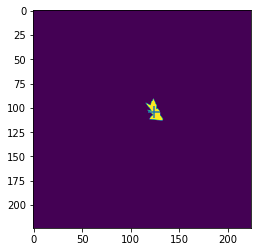

In [77]:
# show the image
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(img )
ax.scatter(center_of_mass[1], center_of_mass[0], s=160, c='C0', marker='+')
fig.savefig('MaskWithCenter.png', dpi=300, transparent=False, bbox_inches='tight') 

In [111]:
# find the mass center
# file_names = ["fileNames"]
# centroids_y = ["Cy"]
# centroids_x = ["Cx"]
def find_mass_centroid(bi_path_list, save=False, save_folder = "", csv_name=""):
    print("genrerate_mass_centroid")
    file_names = ["fileNames"]
    centroids_y = ["Cy"]
    centroids_x = ["Cx"]
    
    i=0
    for path in bi_path_list:
        i+=1
        print("i:", i)
        if i % 20 ==0:
            clear_output(wait=True)
        print(path)
        image = np.array(Image.open(path).convert('L').resize((desired_size, desired_size)))
        label = np.where(image > 0.5, 1, 0)
        num_zeros =  np.count_nonzero(image)
        if num_zeros >0:
            file_name = os.path.basename(path)
            
            properties = regionprops(label, image)
            center_of_mass =  properties[0].centroid
            fig, ax = plt.subplots()
            ax.imshow(image)
            ax.scatter(center_of_mass[1], center_of_mass[0], s=160, c='C0', marker='+')
            yc =  center_of_mass[0]/desired_size
            xc =  center_of_mass[1]/desired_size
            # append to the data list
            file_names.append(file_name)
            centroids_y.append(yc)
            centroids_x.append(xc)
#             print("centroid_np.shape", centroid_np.shape)

            if save==True:
                print("save_folder:", save_folder)
                print("file_name:", file_name)
                save_path = os.path.join(save_folder, file_name)
                print("save_path:", save_path)
                fig.savefig(save_path, dpi=300, transparent=False, bbox_inches='tight') 
        
        else:

            file_name = os.path.basename(path)
            file_names.append(file_name)
#             csv_nam
            yc = 0
            xc = 0
            centroids_y.append(yc)
            centroids_x.append(xc)
        csv_save_path =  os.path.join(save_folder, csv_name)
        print("csv_save_path:", csv_save_path)
        np.savetxt(csv_save_path, [p for p in zip(file_names, centroids_y,centroids_x)], delimiter=',', fmt='%s')
    

In [ ]:
# Train_left_binaris
from glob import glob
from IPython.display import clear_output

Tr_left_bi_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\left"
raw_left_labels_paths =  sorted(glob(Tr_left_bi_root+ "/*.png"))
print("num of left_labels loaded:" , len(raw_left_labels_paths))
output_path ="E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\left_with_mass_centroid"

find_mass_centroid(raw_left_labels_paths, save = True, save_folder = output_path, csv_name = "train_left.csv")

In [ ]:
# clean sk
# You can use IPython.display.clear_output to clear the output of a cell.


E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right\yao01.png
save_folder: E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right_with_mass_centroid
file_name: yao01.png
save_path: E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right_with_mass_centroid\yao01.png
csv_save_path: E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right_with_mass_centroid\train_right.csv
i: 201
E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right\yao010.png
save_folder: E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right_with_mass_centroid
file_name: yao010.png
save_path: E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right_with_mass_centroid\yao010.png
csv_save_path: E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right_with_mass_centroid\train_right.csv
i: 202
E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right\yao011.png


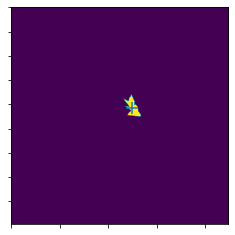

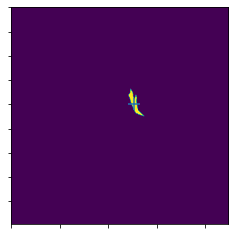

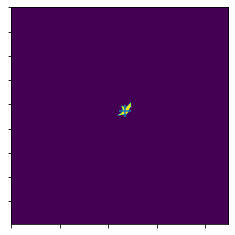

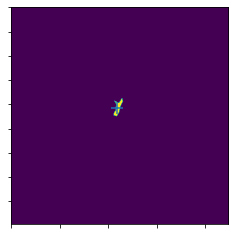

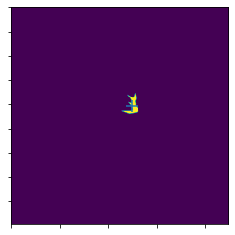

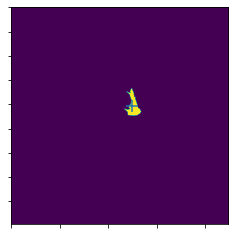

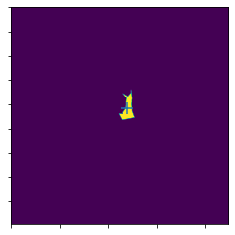

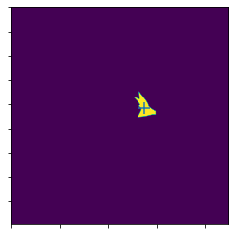

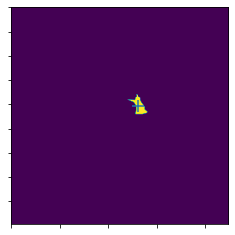

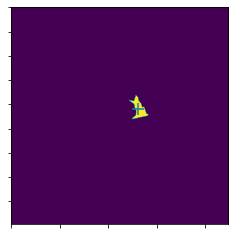

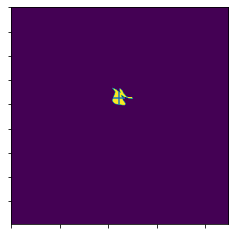

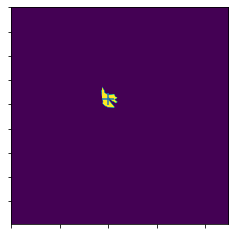

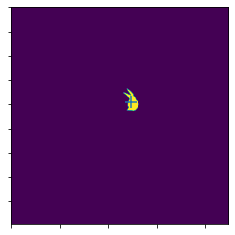

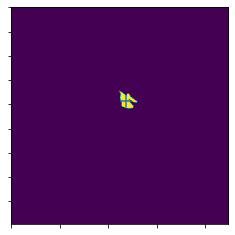

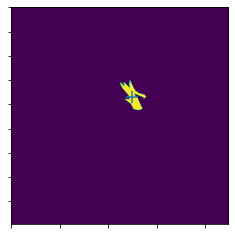

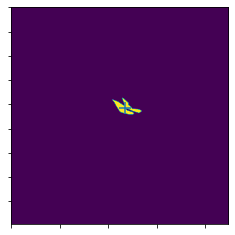

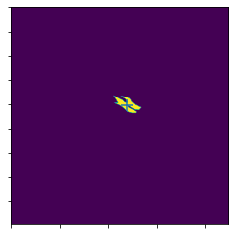

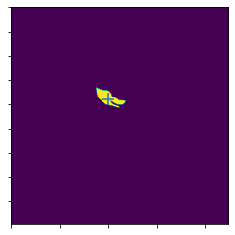

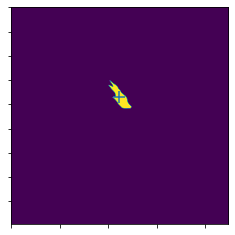

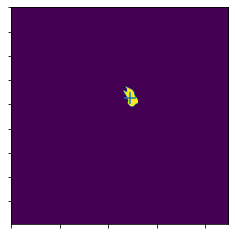

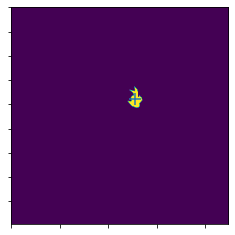

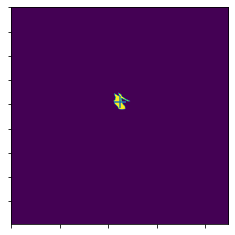

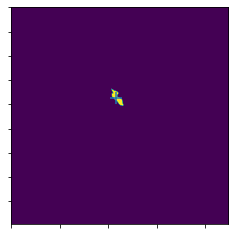

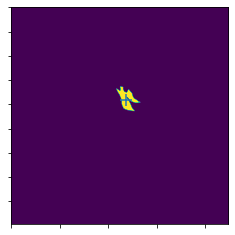

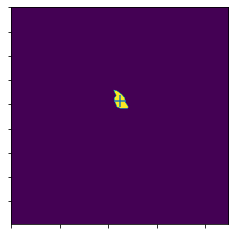

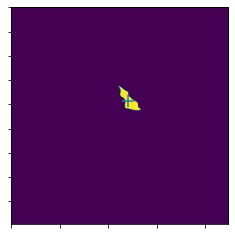

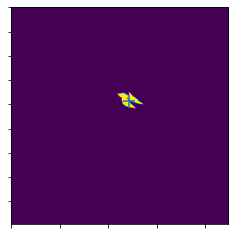

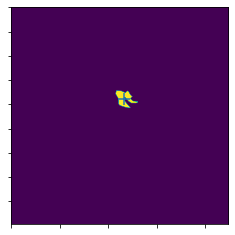

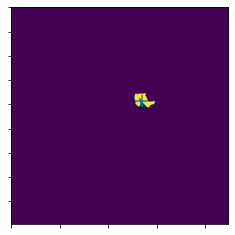

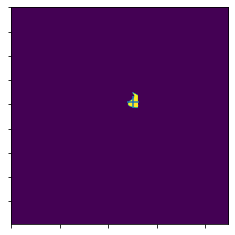

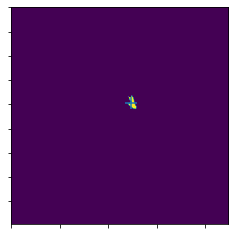

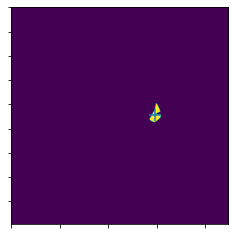

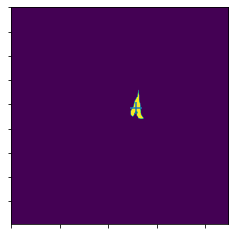

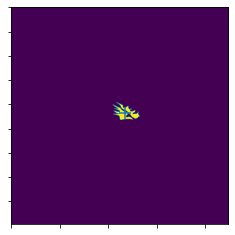

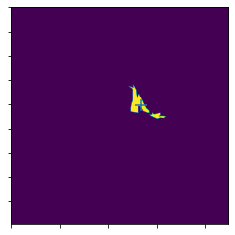

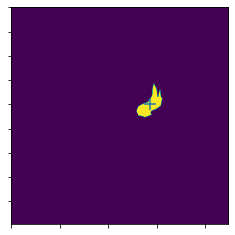

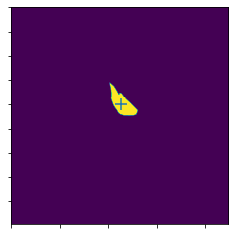

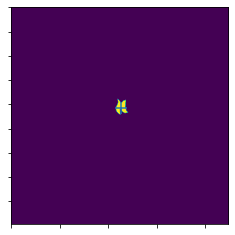

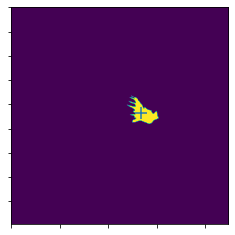

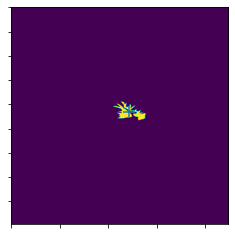

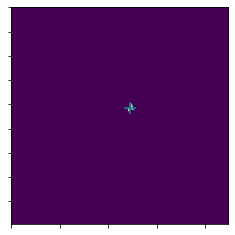

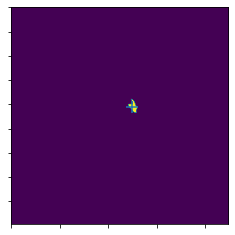

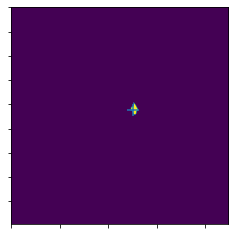

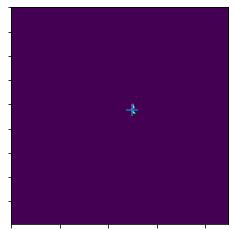

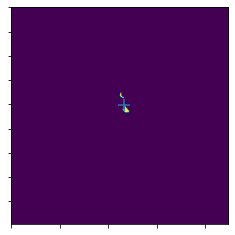

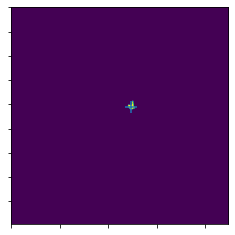

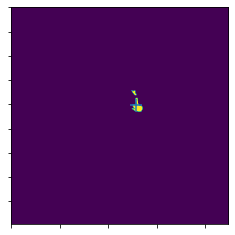

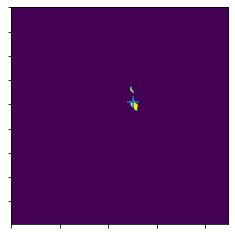

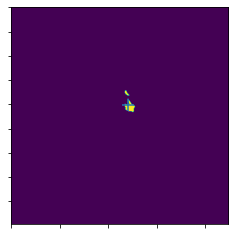

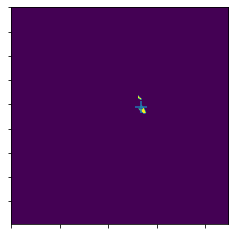

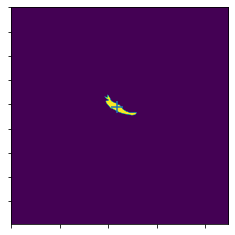

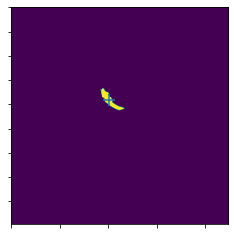

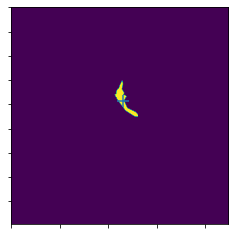

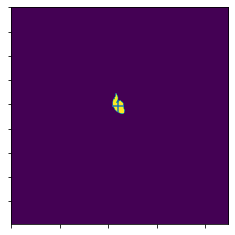

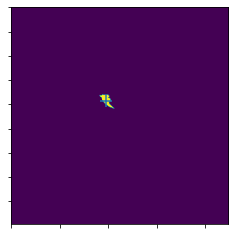

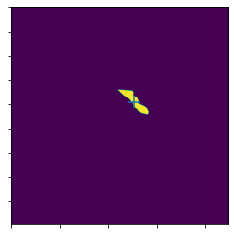

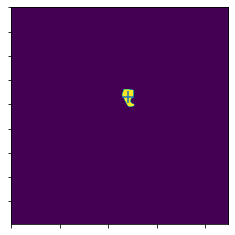

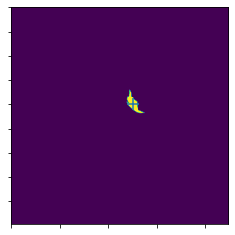

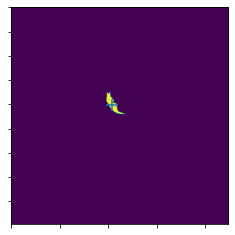

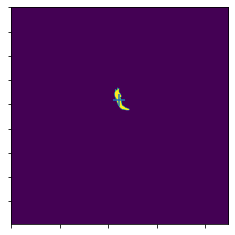

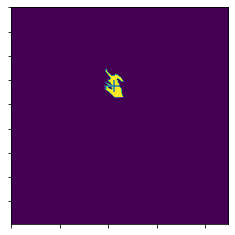

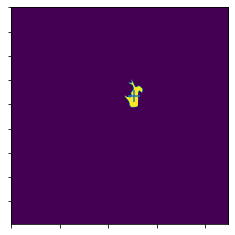

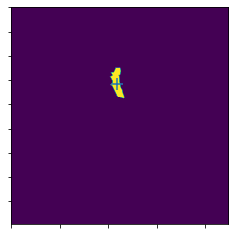

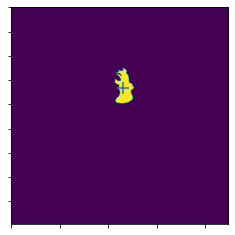

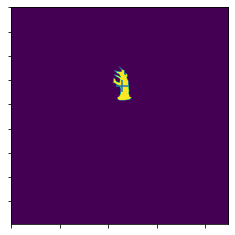

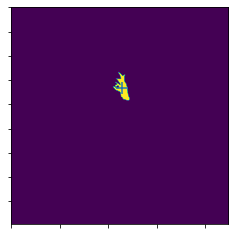

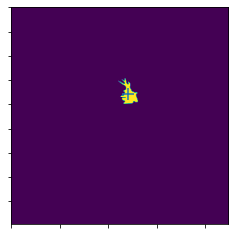

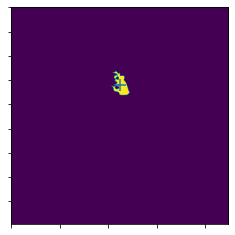

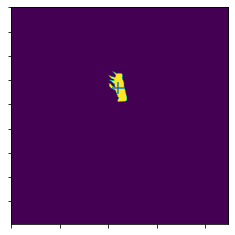

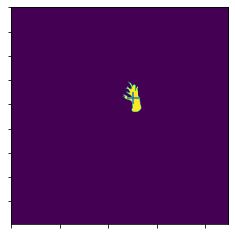

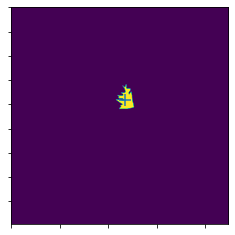

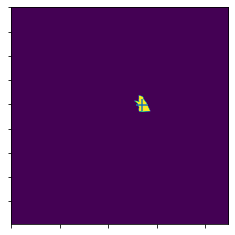

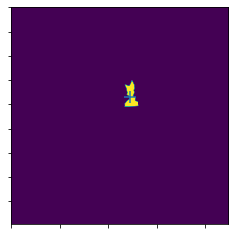

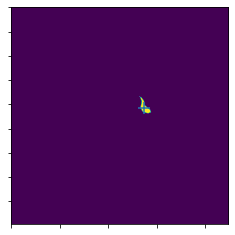

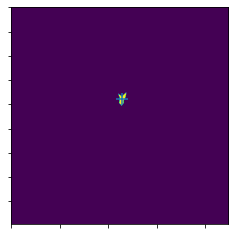

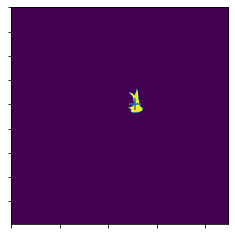

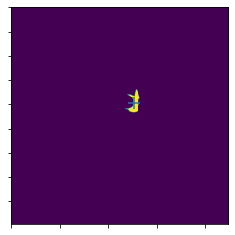

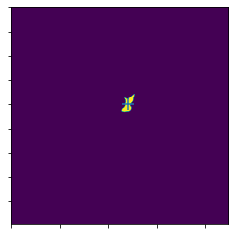

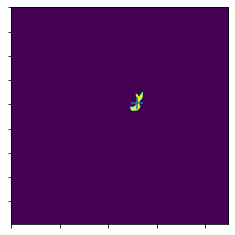

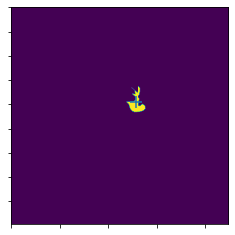

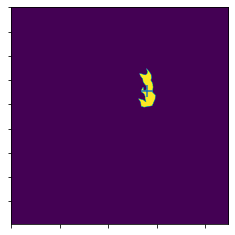

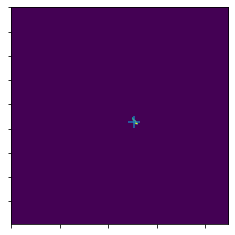

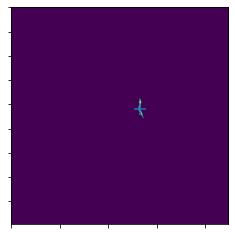

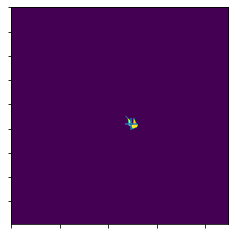

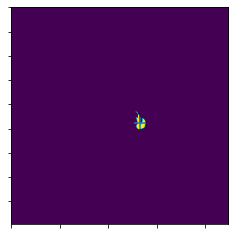

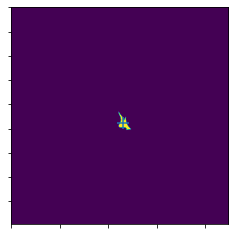

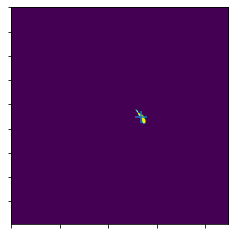

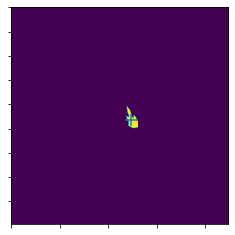

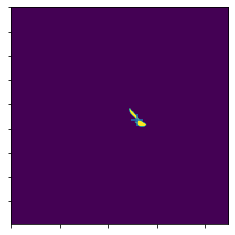

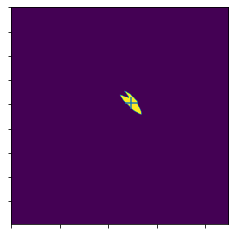

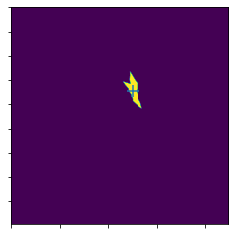

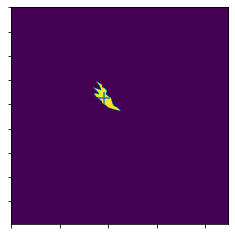

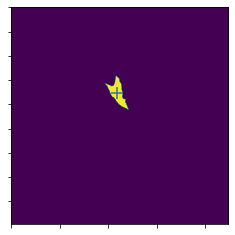

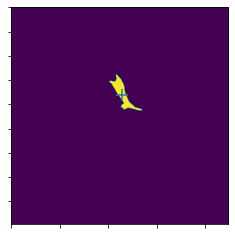

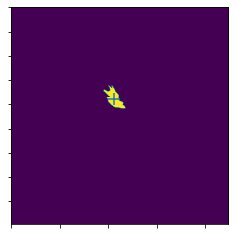

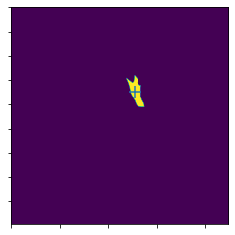

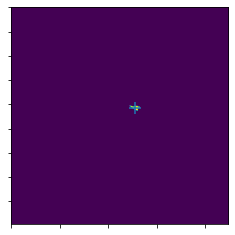

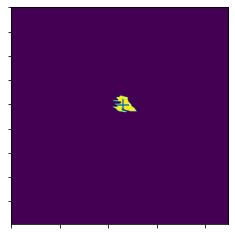

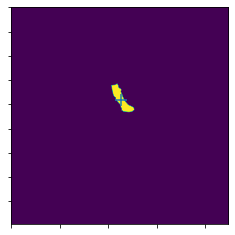

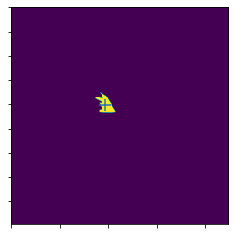

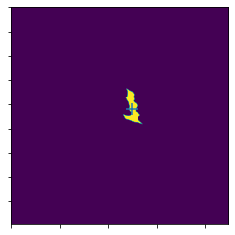

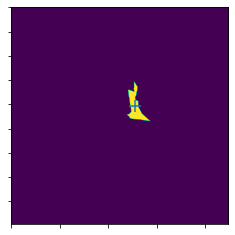

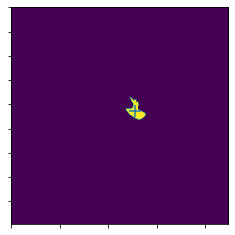

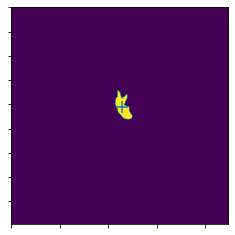

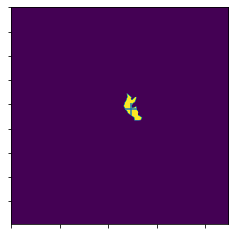

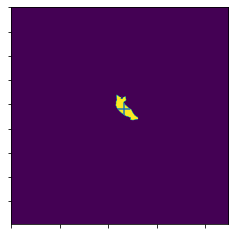

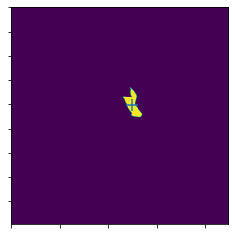

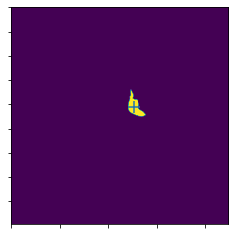

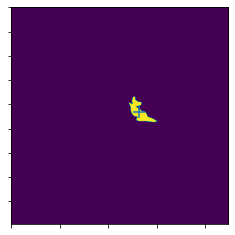

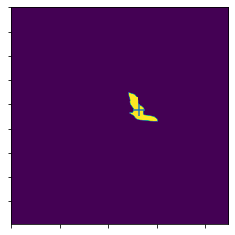

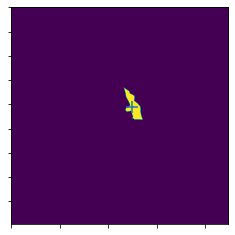

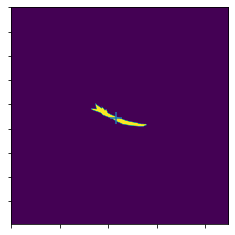

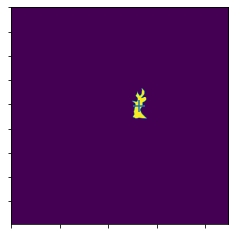

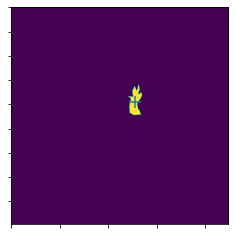

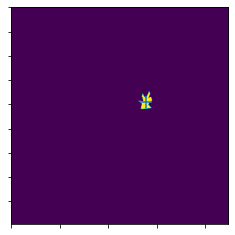

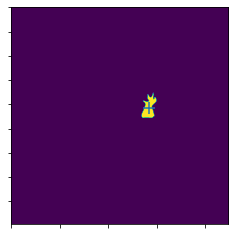

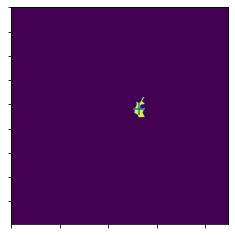

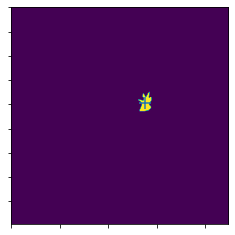

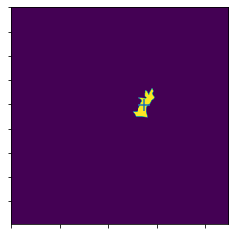

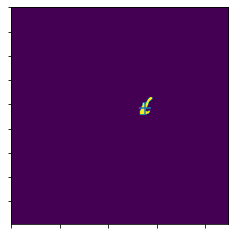

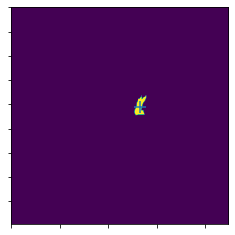

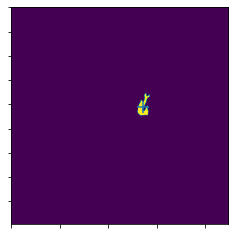

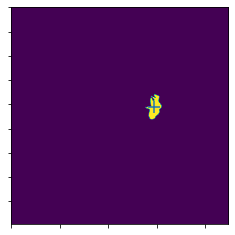

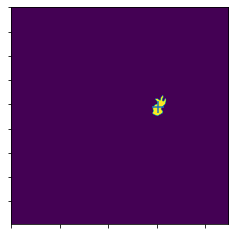

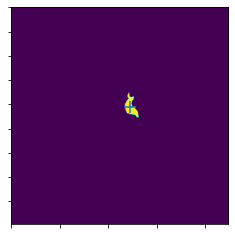

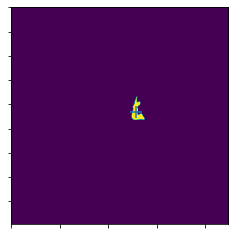

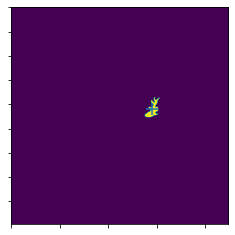

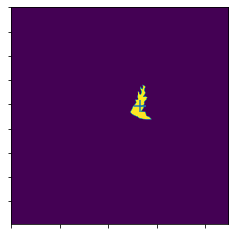

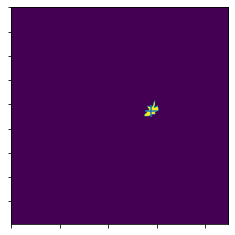

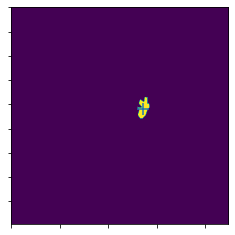

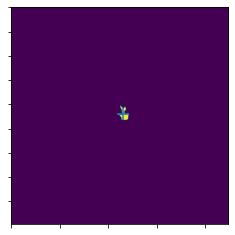

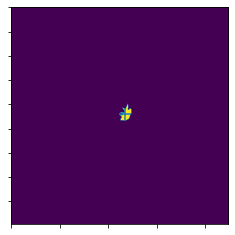

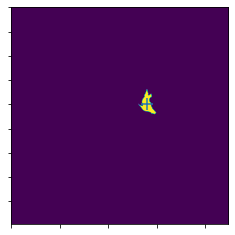

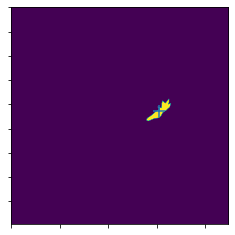

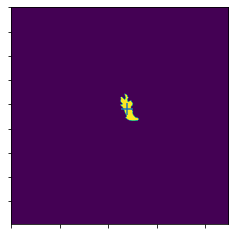

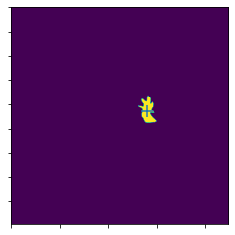

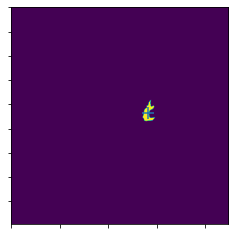

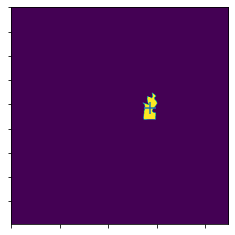

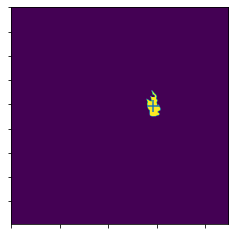

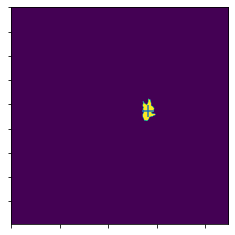

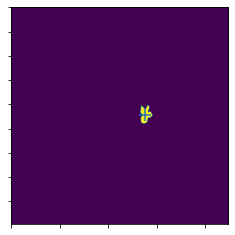

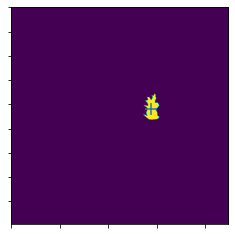

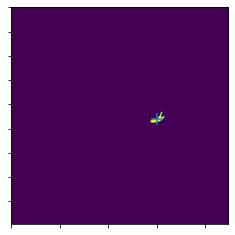

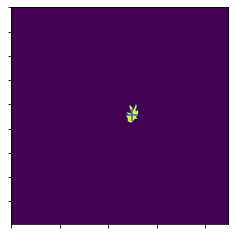

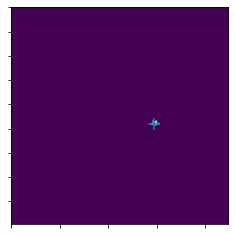

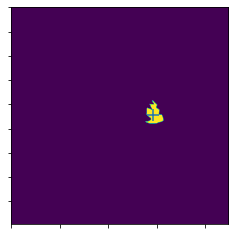

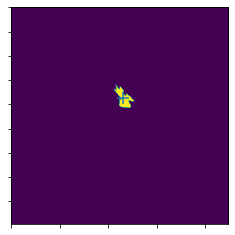

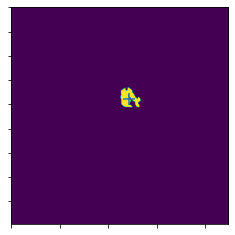

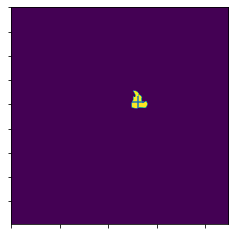

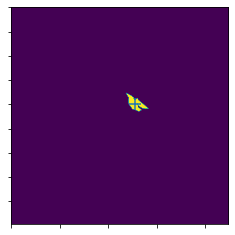

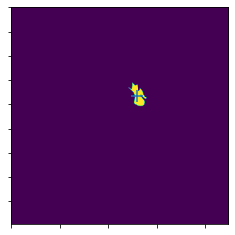

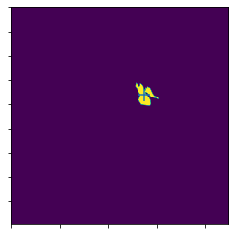

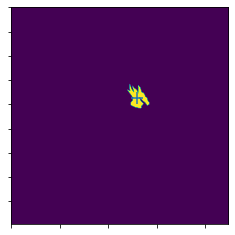

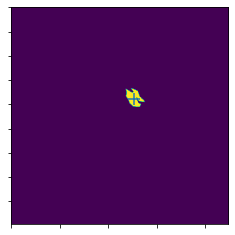

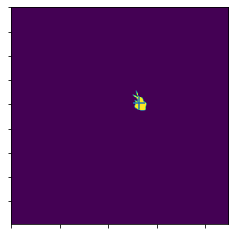

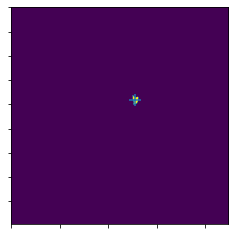

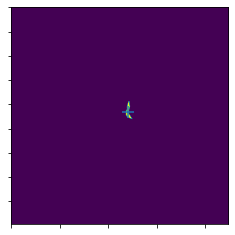

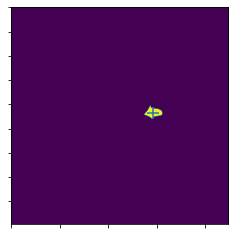

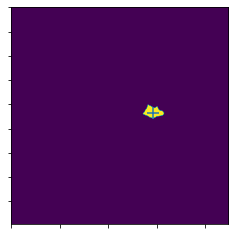

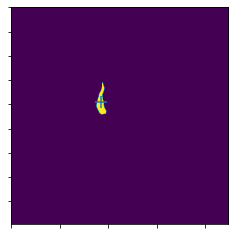

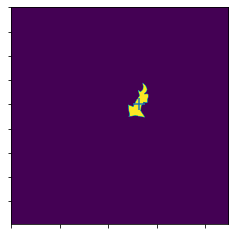

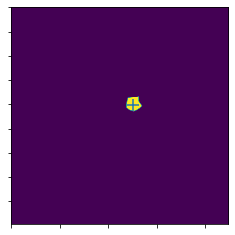

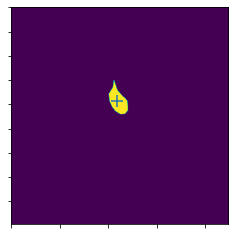

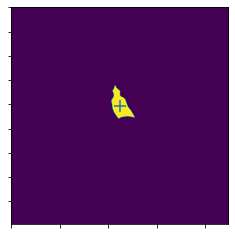

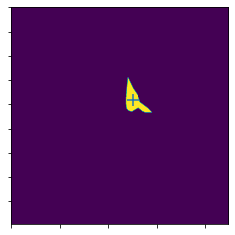

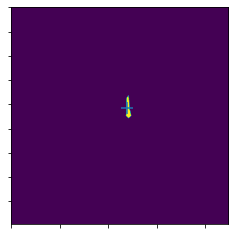

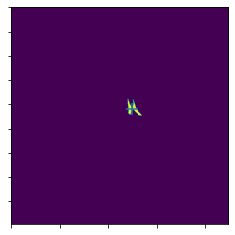

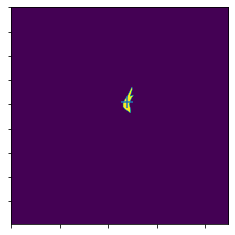

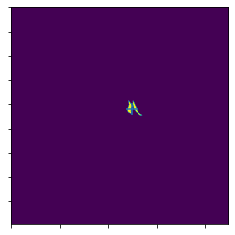

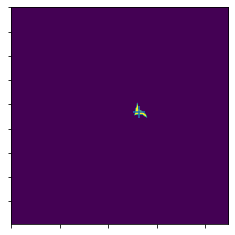

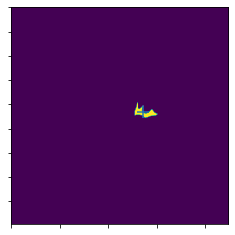

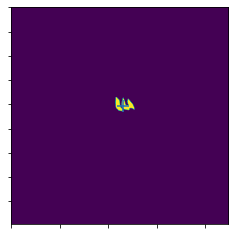

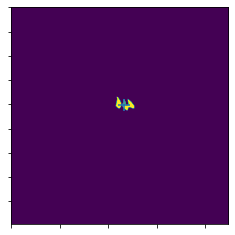

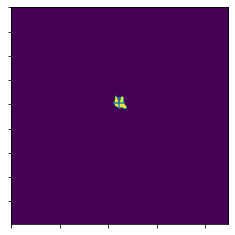

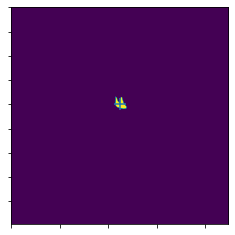

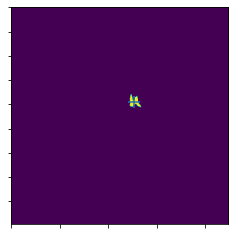

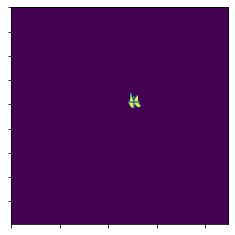

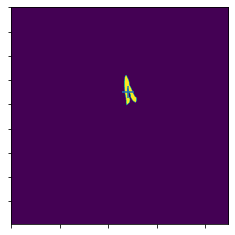

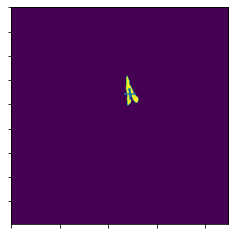

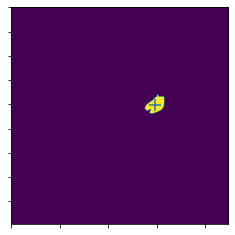

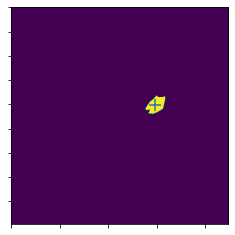

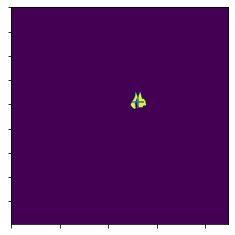

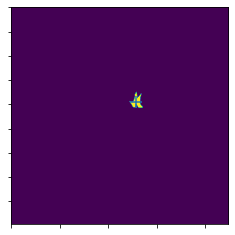

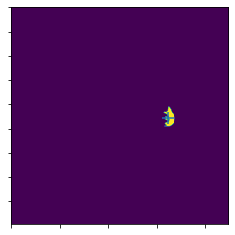

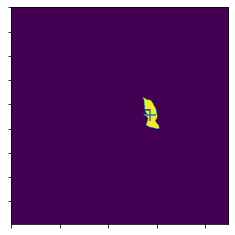

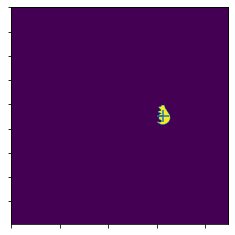

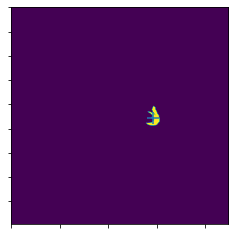

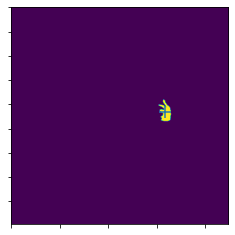

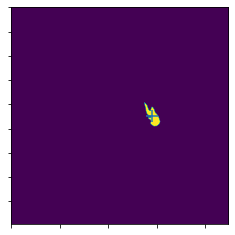

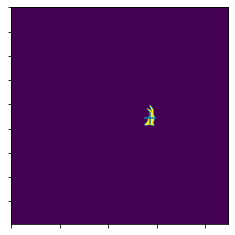

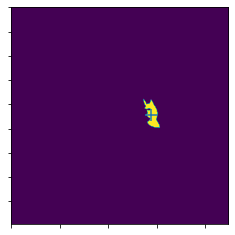

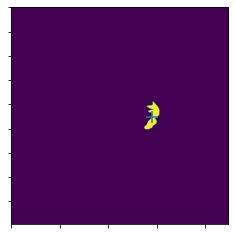

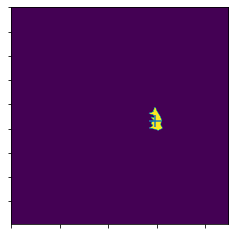

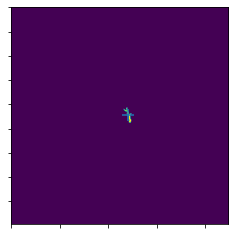

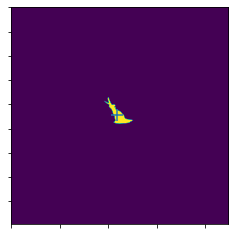

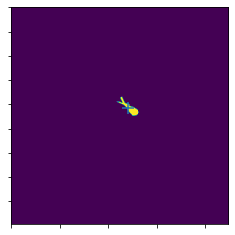

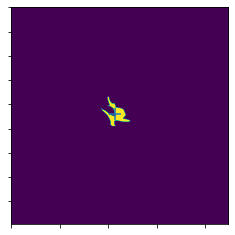

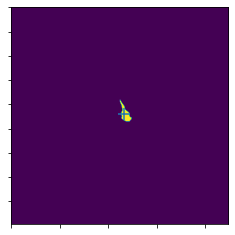

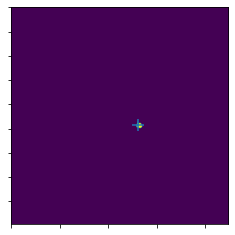

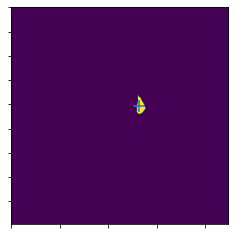

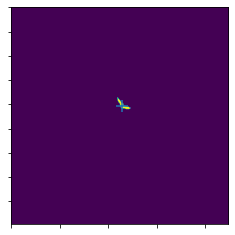

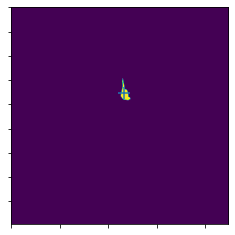

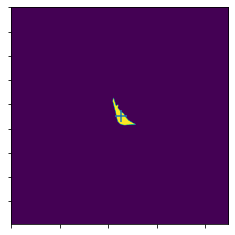

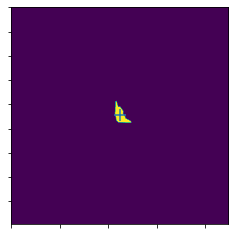

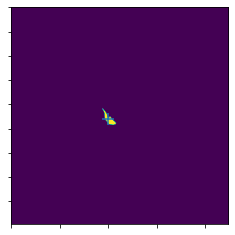

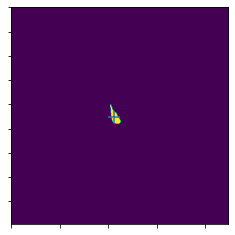

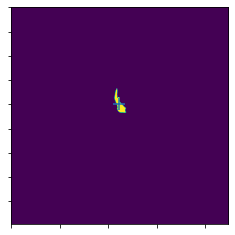

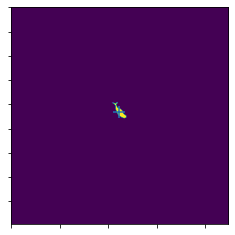

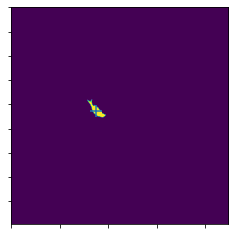

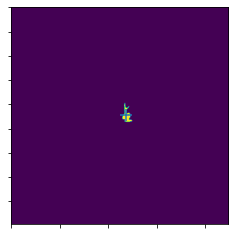

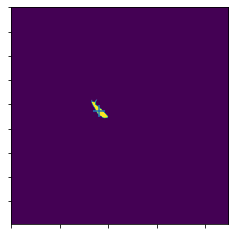

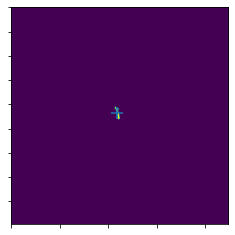

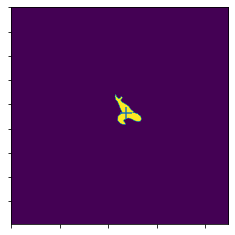

In [114]:
# Train_right_binaris
from glob import glob
Tr_right_bi_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\right"
raw_right_paths =  sorted(glob(Tr_right_bi_root+ "/*.png"))
print("num of left_labels loaded:" , len(raw_left_labels_paths))
output_path ="E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\right_with_mass_centroid"
find_mass_centroid(raw_right_paths, save = True, save_folder = output_path, csv_name = "train_right.csv")

num of left_labels loaded: 3
genrerate_mass_centroid
i: 1
E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\left\167_1558.png
save_folder: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\left_with_mass_centroid
file_name: 167_1558.png
save_path: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\left_with_mass_centroid\167_1558.png
csv_save_path: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\left_with_mass_centroid\val_left.csv
i: 2
E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\left\168_1436.png
save_folder: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\left_with_mass_centroid
file_name: 168_1436.png
save_path: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\left_with_mass_centroid\168_1436.png
csv_save_path: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\left_with_mass_centroid\val_left.csv
i: 3
E:\dataset\SublingualVein\TIASRGB2020\val_left

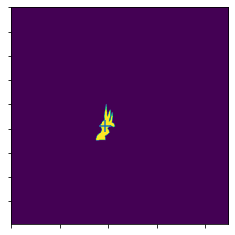

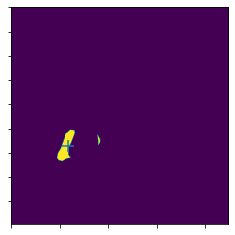

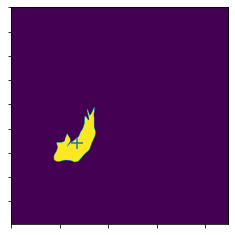

In [112]:
# Val_right_binaris
from glob import glob
Va_left_bi_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\val_left_right_binary_label\\left"
raw_left_paths =  sorted(glob(Va_left_bi_root+ "/*.png"))
print("num of left_labels loaded:" , len(raw_left_paths))
output_path ="E:\\dataset\\SublingualVein\\TIASRGB2020\\val_left_right_binary_label\\left_with_mass_centroid"
find_mass_centroid(raw_left_paths, save = True, save_folder = output_path, csv_name = "val_left.csv")

num of left_labels loaded: 219
genrerate_mass_centroid
i: 1
E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\right\167_1558.png
save_folder: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\right_with_mass_centroid
file_name: 167_1558.png
save_path: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\right_with_mass_centroid\167_1558.png
csv_save_path: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\right_with_mass_centroid\val_right.csv
i: 2
E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\right\168_1436.png
save_folder: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\right_with_mass_centroid
file_name: 168_1436.png
save_path: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\right_with_mass_centroid\168_1436.png
csv_save_path: E:\dataset\SublingualVein\TIASRGB2020\val_left_right_binary_label\right_with_mass_centroid\val_right.csv
i: 3
E:\dataset\SublingualVein\TIASRGB2

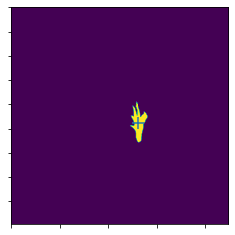

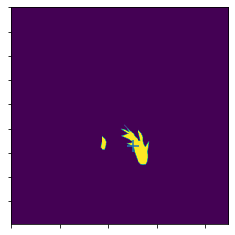

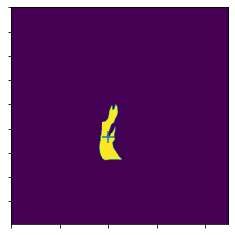

In [113]:
# Val_right_binaris
from glob import glob
Tr_right_bi_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\val_left_right_binary_label\\right"
raw_right_paths =  sorted(glob(Tr_right_bi_root+ "/*.png"))
print("num of left_labels loaded:" , len(raw_left_labels_paths))
output_path ="E:\\dataset\\SublingualVein\\TIASRGB2020\\val_left_right_binary_label\\right_with_mass_centroid"
find_mass_centroid(raw_right_paths, save = True, save_folder = output_path, csv_name = "val_right.csv")